# Machine Learning 
# Recommendation System - Content Based

A content based recommendation system is often used to suggest similar items or related contents. The system uses user's actions and feedbacks such as clicks, views, and ratings to determine their likings and recommend appropriate products.  

Here we used the following popular content-based filtering algorithms. 
* Count Vectorizer
* TF-IDF
* Word2vec
* FastText
* GloVe
* Co-occurance matrix


### Data description
The dataset contains about 4k products in various categories for a UK-based non-store online retail business. The company mainly sells unique all-occasion gifts with maximum wholesaler customers.

Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

Downloadable from https://www.kaggle.com/datasets/carrie1/ecommerce-data

* Skeleton code, images from ProjectPro.

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from gensim import models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from gensim.models import FastText as ft
from IPython.display import Image

## Links to download required word embeddings


#### download w2v
 gdown https://drive.google.com/file/d/1LDdF6M6VzNhXfJyqb1OXLWno8TrExg6o/view?usp=sharing

#### download glove
 wget https://drive.google.com/file/d/1P9JFZ43Id9dXOo_xFpqLkx81jOsXrQC0/view?usp=sharing

#### download fastext
fasttext https://drive.google.com/file/d/1hgb-kxJzFkcktsxBEpthmCxzlwe_IM6o/view?usp=sharing

##  Importing, cleaning the data

In [8]:
df = pd.read_excel("content_data.xlsx")
# Viewing Top 5 Rows
df.head(5)

,StockCode,Product Name,Description,Category,Brand,Unit Price
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,"New unique design, great gift.High quality pla...",Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Rounded rectangular cat-eye reading glasses. T...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,Each Nintendo 2DS kit is printed with super-hi...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,The sheerest compression stocking in its class...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38
4,84836,Stupell Industries Chevron Initial Wall D cor,Features: -Made in the USA. -Sawtooth hanger o...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99


In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StockCode     3958 non-null   object 
 1   Product Name  3958 non-null   object 
 2   Description   3958 non-null   object 
 3   Category      3856 non-null   object 
 4   Brand         3818 non-null   object 
 5   Unit Price    3943 non-null   float64
dtypes: float64(1), object(5)
memory usage: 185.7+ KB


In [9]:
# Total Null Values in Data
df.isnull().sum(axis = 0)

StockCode         0
Product Name      0
Description       0
Category        102
Brand           140
Unit Price       15
dtype: int64

In [10]:
# Droping Null Values
df.dropna().reset_index(inplace = True)

In [11]:
# Data Shape
df.shape

(3958, 6)

In [12]:
df

,StockCode,Product Name,Description,Category,Brand,Unit Price
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,"New unique design, great gift.High quality pla...",Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Rounded rectangular cat-eye reading glasses. T...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,Each Nintendo 2DS kit is printed with super-hi...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,The sheerest compression stocking in its class...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38
4,84836,Stupell Industries Chevron Initial Wall D cor,Features: -Made in the USA. -Sawtooth hanger o...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99
...,...,...,...,...,...,...
3953,84612B,Home Cardboard Flower Print Travel Memo Collec...,"Special design, easy to insert and remove your...","Arts, Crafts & Sewing|Scrapbooking|Albums & Re...",Unique Bargains,20.99
3954,47502,6 1/4 x 6 1/4 Gatefold Invitation - Mandarin O...,Announce your event using a classic Gatefold s...,Office|Envelopes & Mailing Supplies|Envelopes,Envelopes.com,55.23
3955,84546,"Three Things That Makes Good Coffee: Sugar, Su...",Product Features:Size: 35in x 18inColor: Light...,Home Improvement|Paint|Wall Decals|All Wall De...,Style & Apply,39.95
3956,21923,Women's Breeze Walker,"Supple leather uppers with lining, three adjus...",Clothing|Shoes|Womens Shoes|All Womens Shoes,Prop?t,76.95


## Loading pretrained models

In [14]:
# Importing Word2Vec
word2vecModel = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [16]:
# Importing FastText
fasttext_model=ft.load_fasttext_format("cc.en.300.bin.gz")

/var/folders/y5/013n1jzn1l98t92dgv99vpz80000gn/T/ipykernel_70256/3852502280.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_model=ft.load_fasttext_format("cc.en.300.bin.gz")


In [17]:
# Import Glove
glove_df = pd.read_csv('glove.6B.300d.txt', sep=" ",
                       quoting=3, header=None, index_col=0)
glove_model = {key: value.values for key, value in glove_df.T.items()}

## Importing Count Vectorizer and TFIDF

In [18]:
# Importing Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Importing TFIDF
tfidf_vec = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,3))

## Preprocessing

In [19]:
# Combining Product and Description
df['Description'] = df['Product Name'] + ' ' +df['Description']

# Dropping Duplicates and keeping first record
unique_df = df.drop_duplicates(subset=['Description'], keep='first')

# Converting String to Lower Case
unique_df['desc_lowered'] = unique_df['Description'].apply(lambda x: x.lower()) 

# Remove Stop special Characters
unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Coverting Description to List
desc_list = list(unique_df['desc_lowered'])

/var/folders/y5/013n1jzn1l98t92dgv99vpz80000gn/T/ipykernel_70256/2310211820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['desc_lowered'] = unique_df['Description'].apply(lambda x: x.lower())
/var/folders/y5/013n1jzn1l98t92dgv99vpz80000gn/T/ipykernel_70256/2310211820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [20]:
unique_df=unique_df.reset_index(drop=True)

In [21]:
unique_df.reset_index(inplace=True)

In [22]:
unique_df

,index,StockCode,Product Name,Description,Category,Brand,Unit Price,desc_lowered
0,0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,Ganma Superheroes Ordinary Life Case For Samsu...,Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99,ganma superheroes ordinary life case for samsu...
1,1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Eye Buy Express Prescription Glasses Mens Wome...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22,eye buy express prescription glasses mens wome...
2,2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,MightySkins Skin Decal Wrap Compatible with Ni...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99,mightyskins skin decal wrap compatible with ni...
3,3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38,mediven sheer and soft 1520 mmhg thigh w lace ...
4,4,84836,Stupell Industries Chevron Initial Wall D cor,Stupell Industries Chevron Initial Wall D cor ...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99,stupell industries chevron initial wall d cor ...
...,...,...,...,...,...,...,...,...
797,797,35824B,BlackBerry Q5 Charger Micro USB 2.0 Cable Kit ...,BlackBerry Q5 Charger Micro USB 2.0 Cable Kit ...,NaN,Ixir,14.99,blackberry q5 charger micro usb 20 cable kit b...
798,798,90187A,HJ Scott St. James Rustic Dartboard Dart Board...,HJ Scott St. James Rustic Dartboard Dart Board...,Sports & Outdoors|Recreation|Game Room|Darts &...,HJ Scott,399.59,hj scott st james rustic dartboard dart board ...
799,799,90037D,"3 Pack - Revlon Ultra HD Lip Lacquer, HD Garne...","3 Pack - Revlon Ultra HD Lip Lacquer, HD Garne...",Beauty|Makeup|Lips,Revlon,27.27,3 pack revlon ultra hd lip lacquer hd garnet ...
800,800,84612B,Home Cardboard Flower Print Travel Memo Collec...,Home Cardboard Flower Print Travel Memo Collec...,"Arts, Crafts & Sewing|Scrapbooking|Albums & Re...",Unique Bargains,20.99,home cardboard flower print travel memo collec...


# Similarity Measures

## Manhattan distance 

Calculated as the sum of the absolute differences between the two vectors.


## Euclidean distance 

Calculated as the square root of the sum of the squared differences between the two vectors.



## Cosine similarity 


Cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes).



# Functions for Ranking

In [23]:
def find_euclidean_distances(sim_matrix, index, n=10): 

    # Getting Score and Index
    result = list(enumerate(sim_matrix[index]))

    # Sorting the Score and taking top 10 products
    sorted_result = sorted(result,key=lambda x:x[1],reverse=False)[1:10+1]

    # Mapping index with data
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
    
    return similar_products

In [24]:
def find_similarity(cosine_sim_matrix, index, n=10):
    
    # Getting Score and Index
    result = list(enumerate(cosine_sim_matrix[index]))
    
    # Sorting the Score
    sorted_result = sorted(result,key=lambda x:x[1],reverse=True)[1:n+1]
    
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
     
    return similar_products


In [25]:
def find_manhattan_distance(sim_matrix, index, n=10):   
     
    # Getting Score and Index
    result = list(enumerate(sim_matrix[index]))

    # Sorting the Score and taking top 10 products
    sorted_result = sorted(result,key=lambda x:x[1],reverse=False)[1:10+1]
    
    # Mapping index with data
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
    
    return similar_products


# Recommendation functions using various features

## Count Vectorizer

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis). Let us consider a few sample texts from a document (each as a list element):

document = [ “One Geek helps Two Geeks”, “Two Geeks help Four Geeks”, “Each Geek helps many other Geeks at GeeksforGeeks.”]

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.  This can be visualized as follows –

from https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

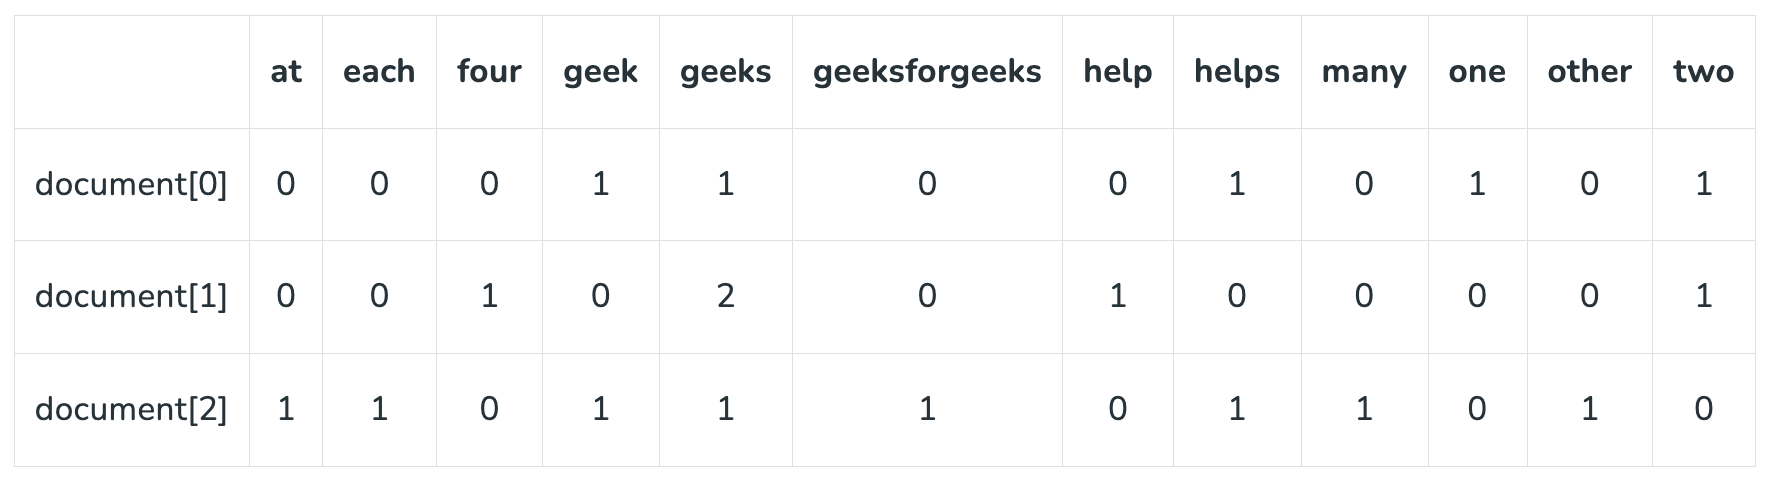

In [26]:
product_id = 'Vickerman 14" Finial Drop Christmas Ornaments, Pack of 2'

In [27]:
# Comparing similarity to get the top matches using count vectorizer 
#
# product_id = product name 
# df = product database
# similarity = similarity measures: 'manhattan', 'euclidean', 'cosine'
# n = number of proudcts to recommend

def get_recommendation_cv(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    index = list(row.index)[0]
    description = row['desc_lowered'].loc[index]

    # Create vector using Count Vectorizer
    # Convert a collection of text documents to a matrix of token counts.

    count_vector = count_vectorizer.fit_transform(desc_list)
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(count_vector)
        products = find_similarity(sim_matrix , index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(count_vector)
        products = find_manhattan_distance(sim_matrix , index)
        
    else:
        sim_matrix = euclidean_distances(count_vector)
        products = find_euclidean_distances(sim_matrix , index)

    return products


In [28]:
# Cosine Similarity 
get_recommendation_cv(product_id, unique_df, similarity = "cosine", n=10)

[{'value': 'Fancyleo Christmas Glasses Frames 2 Pack Glittered Eyeglasses Glasses Set No Lens Kids Family Xmas Party Ornaments Gift',
  'score': 0.28},
 {'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 0.2},
 {'value': '16 inches 40 inches "MERRY CHRISTMAS" Letter Foil Inflated Balloon Float Helium Aluminum Balloons for Christmas Decoration',
  'score': 0.19},
 {'value': '12ct Light Gunmetal Gray Shatterproof 4-Finish Christmas Ball Ornaments 4" (100mm)',
  'score': 0.19},
 {'value': 'PeanutsÃƒâ€šÃ‚ Valentine Sign Craft Kit (Pack of 12)',
  'score': 0.13},
 {'value': 'Simplicity 3 Pack Elastic Hair Ties White/Pink/Pink Leopard, 24 Count',
  'score': 0.13},
 {'value': '3 Pack Newbee Fashion- "Butterfly" Thin Design Gold Emblem Reading Glasses with Lanyard +1.75',
  'score': 0.12},
 {'value': 'Paper Mate Write Bros. Grip Mechanical Pencil, 0.7mm 5 ea (Pack of 2)',
  'score': 0.11},
 {'value': 'Christopher Radko Glass Plum Fr

In [29]:
# Manhattan Similarity 
get_recommendation_cv(product_id, unique_df, similarity = "manhattan", n=10)

[{'value': 'Stepping Stones', 'score': 43.0},
 {'value': 'Global Portuguese', 'score': 43.0},
 {'value': 'Polo Blue by Ralph Lauren', 'score': 43.0},
 {'value': 'Auburn Leathercrafters Tuscany Leather Dog Collar', 'score': 45.0},
 {'value': 'Leftover Salmon', 'score': 45.0},
 {'value': 'Good (Vinyl)', 'score': 45.0},
 {'value': 'Drunken Monkeys', 'score': 45.0},
 {'value': 'DuraTech Roof Support Trim', 'score': 47.0},
 {'value': 'Amerlite Niche Sealing Ring', 'score': 47.0},
 {'value': 'Learning and Performance in Corrections', 'score': 47.0}]

In [30]:
# Euclidean Similarity 
get_recommendation_cv(product_id, unique_df, similarity = "euclidean", n=10)

[{'value': 'Polo Blue by Ralph Lauren', 'score': 9.0},
 {'value': 'Auburn Leathercrafters Tuscany Leather Dog Collar', 'score': 9.11},
 {'value': 'Global Portuguese', 'score': 9.11},
 {'value': 'Stepping Stones', 'score': 9.22},
 {'value': 'Always in My Heart', 'score': 9.22},
 {'value': 'Leftover Salmon', 'score': 9.22},
 {'value': 'Good (Vinyl)', 'score': 9.22},
 {'value': 'Drunken Monkeys', 'score': 9.22},
 {'value': 'Learning and Performance in Corrections', 'score': 9.43},
 {'value': 'Chasing Hamburg (Vinyl)', 'score': 9.43}]

## TF-IDF

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

from https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

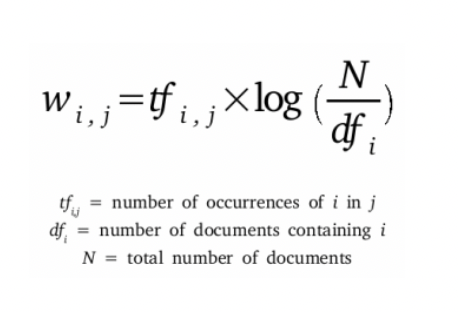


documentA = 'the man went out for a walk'

documentB = 'the children sat around the fire'

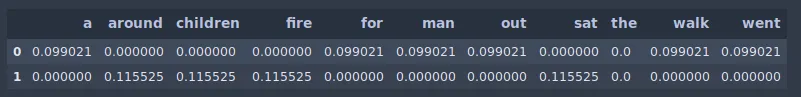

In [31]:
# Comparing similarity to get the top matches using TF-IDF
#
# product_id = product name 
# df = product database
# similarity = similarity measures: 'manhattan', 'euclidean', 'cosine'
# n = number of proudcts to recommend

def get_recommendation_tfidf(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    index = list(row.index)[0]
    description = row['desc_lowered'].loc[index]

    #Create vector using tfidf
    
    tfidf_matrix = tfidf_vec.fit_transform(desc_list)
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(tfidf_matrix)
        products = find_similarity(sim_matrix , index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(tfidf_matrix)
        products = find_manhattan_distance(sim_matrix , index)
        
    else:
        sim_matrix = euclidean_distances(tfidf_matrix)
        products = find_euclidean_distances(sim_matrix , index)

    return products

In [32]:
# Cosine Similarity 
get_recommendation_tfidf(product_id, unique_df, similarity = "cosine", n=10)

[{'value': 'Fancyleo Christmas Glasses Frames 2 Pack Glittered Eyeglasses Glasses Set No Lens Kids Family Xmas Party Ornaments Gift',
  'score': 0.07},
 {'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 0.05},
 {'value': '12ct Light Gunmetal Gray Shatterproof 4-Finish Christmas Ball Ornaments 4" (100mm)',
  'score': 0.05},
 {'value': '16 inches 40 inches "MERRY CHRISTMAS" Letter Foil Inflated Balloon Float Helium Aluminum Balloons for Christmas Decoration',
  'score': 0.05},
 {'value': 'Is It To Late To Be Good Grinch Christmas Mens Tank Top Shirt',
  'score': 0.02},
 {'value': 'Christopher Radko Glass Plum Frosty Snowman Christmas Ornament #1017624',
  'score': 0.02},
 {'value': 'CMFUN Watercolor Brush Creative Flower Made with Ink Hand Painting for Your Designs Pillowcase 20x20 inch',
  'score': 0.02},
 {'value': 'SKIN DECAL FOR OtterBox Symmetry Samsung Galaxy S7 Case - Christmas Snowflake Blue Ornaments DECAL, NOT A CAS

In [33]:
# Manhattan Similarity 
get_recommendation_tfidf(product_id, unique_df, similarity = "manhattan", n=10)

[{'value': 'Stepping Stones', 'score': 11.05},
 {'value': 'Global Portuguese', 'score': 11.42},
 {'value': 'Polo Blue by Ralph Lauren', 'score': 11.68},
 {'value': 'DuraTech Roof Support Trim', 'score': 12.06},
 {'value': 'Silver Metallic Foil Streamers', 'score': 12.07},
 {'value': 'Pro Pinstripe Jersey Sleeveles', 'score': 12.07},
 {'value': 'Amerlite Niche Sealing Ring', 'score': 12.07},
 {'value': 'Leftover Salmon', 'score': 12.3},
 {'value': 'Drunken Monkeys', 'score': 12.32},
 {'value': "Alfred's Drum Method, Book 1", 'score': 12.41}]

In [34]:
# Euclidean Similarity 
get_recommendation_tfidf(product_id, unique_df, similarity = "euclidean", n=10)

[{'value': 'Fancyleo Christmas Glasses Frames 2 Pack Glittered Eyeglasses Glasses Set No Lens Kids Family Xmas Party Ornaments Gift',
  'score': 1.37},
 {'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 1.38},
 {'value': '12ct Light Gunmetal Gray Shatterproof 4-Finish Christmas Ball Ornaments 4" (100mm)',
  'score': 1.38},
 {'value': '16 inches 40 inches "MERRY CHRISTMAS" Letter Foil Inflated Balloon Float Helium Aluminum Balloons for Christmas Decoration',
  'score': 1.38},
 {'value': 'Is It To Late To Be Good Grinch Christmas Mens Tank Top Shirt',
  'score': 1.4},
 {'value': 'Christopher Radko Glass Plum Frosty Snowman Christmas Ornament #1017624',
  'score': 1.4},
 {'value': 'CMFUN Watercolor Brush Creative Flower Made with Ink Hand Painting for Your Designs Pillowcase 20x20 inch',
  'score': 1.4},
 {'value': 'SKIN DECAL FOR OtterBox Symmetry Samsung Galaxy S7 Case - Christmas Snowflake Blue Ornaments DECAL, NOT A CASE',

## Word2vec

Word2Vec is a shallow, two-layer neural networks which is trained to reconstruct linguistic contexts of words. It takes as its input a large corpus of words and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. Word2Vec is a particularly computationally-efficient predictive model for learning word embeddings from raw text.

from https://israelg99.github.io/2017-03-23-Word2Vec-Explained/

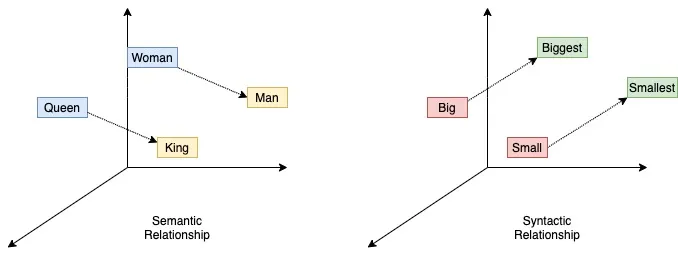

from https://towardsdatascience.com/word2vec-research-paper-explained-205cb7eecc30

Word2Vec is a widely used method in natural language processing (NLP) that allows words to be represented as vectors in a continuous vector space. Word2Vec is an effort to map words to high-dimensional vectors to capture the semantic relationships between words, developed by researchers at Google. Words with similar meanings should have similar vector representations, according to the main principle of Word2Vec. Word2Vec utilizes two architectures:

from https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

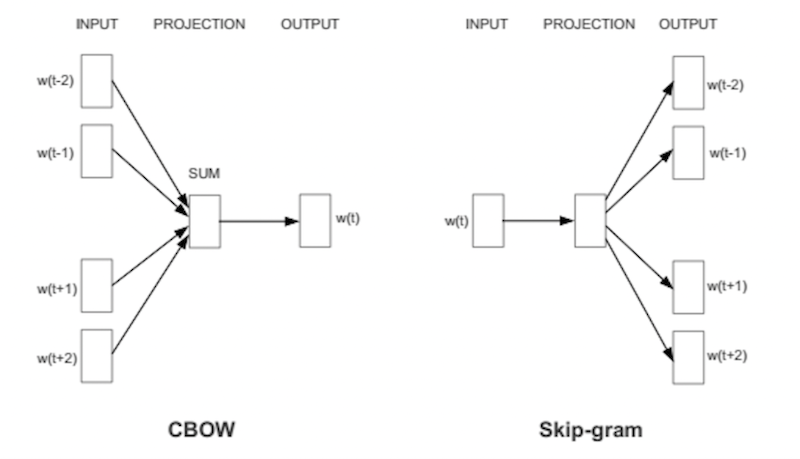

In [35]:
# Comparing similarity to get the top matches using Word2Vec pretrained model
#
# product_id = product name 
# df = product database
# similarity = similarity measures: 'manhattan', 'euclidean', 'cosine'
# n = number of proudcts to recommend

def get_recommendation_word2vec(product_id, df, similarity, n=10):
    
    row = df.loc[df['Product Name'] == product_id]
    input_index = list(row.index)[0]
    description = row['desc_lowered'].loc[input_index]

    #create vectors for each desc using word2vec
    vector_matrix = np.empty((len(desc_list), 300))
    for index, each_sentence in enumerate(desc_list):
        sentence_vector = np.zeros((300,))
        count  = 0
        for each_word in each_sentence.split():
            try:
                sentence_vector += word2vecModel[each_word]
                count += 1
            except:
                continue
        
        vector_matrix[index] = sentence_vector
        
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(vector_matrix)
        products = find_similarity(sim_matrix , input_index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(vector_matrix)
        products = find_manhattan_distance(sim_matrix , input_index)
        
    else:
        sim_matrix = euclidean_distances(vector_matrix)
        products = find_euclidean_distances(sim_matrix , input_index)

    return products

In [36]:
# Cosine Similarity 
get_recommendation_word2vec(product_id, unique_df, similarity = "cosine", n=10)

[{'value': 'Fancyleo Christmas Glasses Frames 2 Pack Glittered Eyeglasses Glasses Set No Lens Kids Family Xmas Party Ornaments Gift',
  'score': 0.85},
 {'value': 'Red Gift Wrap Bag by K-Kraft (Festive Red Stripes, 13 x 17.5 inches)',
  'score': 0.85},
 {'value': '12 Pcs 3D Butterfly Stickers DIY Mural Art Decal Wall Stickers Crafts Wall Paper Decor (Yellow Series)',
  'score': 0.84},
 {'value': 'Cat Mod Garden Complex - Unfinished/Black', 'score': 0.83},
 {'value': 'Three Things That Makes Good Coffee: Sugar, Sugar and More Sugar Wall Decal - wall decal, sticker, quotes and sayings - W5082 - Light pink, 35in x 18in',
  'score': 0.82},
 {'value': 'Halloween Bats Wall Decal - Wall Sticker, Vinyl Wall Art, Home Decor, Wall Mural - W5014 - Royal blue, 16in x 10in',
  'score': 0.82},
 {'value': 'Hibiscus Flowers Wall Decal - Wall Sticker, Vinyl Wall Art, Home Decor, Wall Mural - 2186 - 8in x 19in, Dark green',
  'score': 0.82},
 {'value': 'Abstract Heart Plant Wall Decal - Wall Sticker, Vi

In [37]:
# Manhattan Similarity 
get_recommendation_word2vec(product_id, unique_df, similarity = "manhattan", n=10)

[{'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 458.13},
 {'value': '8 1/2 x 14 Cardstock - Crystal Metallic (500 Qty.)',
  'score': 488.19},
 {'value': 'Cavalier Spaniel St. Patricks Day Shamrock Mouse Pad&#44; Hot Pad Or Trivet',
  'score': 497.0},
 {'value': "Call of the Wild Howling the Full Moon Women's Racerback Alpha Wolf",
  'score': 509.22},
 {'value': 'Fringe Table Skirt Purple 9 ft x 29 inches Pkg/1',
  'score': 516.08},
 {'value': 'Trend Enterprises T-83315 1.25 in. Holiday Pals & Peppermint Scratch N Sniff Stinky Stickers&#44; Large Round',
  'score': 522.0},
 {'value': "Allwitty 1039 - Women's T-Shirt Ipac Pistol Gun Apple Iphone Parody",
  'score': 525.03},
 {'value': 'Clear 18 Note Acrylic Box Musical Paperweight - Light My Fire',
  'score': 526.08},
 {'value': 'Handcrafted Ercolano Music Box Featuring "Luncheon of the Boating Party" by Renoir, Pierre Auguste - New YorkNew York',
  'score': 527.88},
 {'va

In [38]:
# Euclidean Similarity 
get_recommendation_word2vec(product_id, unique_df, similarity = "euclidean", n=10)

[{'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 32.76},
 {'value': '8 1/2 x 14 Cardstock - Crystal Metallic (500 Qty.)',
  'score': 34.82},
 {'value': 'Cavalier Spaniel St. Patricks Day Shamrock Mouse Pad&#44; Hot Pad Or Trivet',
  'score': 35.78},
 {'value': "Call of the Wild Howling the Full Moon Women's Racerback Alpha Wolf",
  'score': 36.09},
 {'value': 'Fringe Table Skirt Purple 9 ft x 29 inches Pkg/1', 'score': 36.28},
 {'value': "New Way 075 - Men's Sleeveless Fbi Female Body Inspector",
  'score': 37.43},
 {'value': 'Trend Enterprises T-83315 1.25 in. Holiday Pals & Peppermint Scratch N Sniff Stinky Stickers&#44; Large Round',
  'score': 37.51},
 {'value': 'Platinum 5 mm Comfort Fit Half Round Wedding Band - Size 9.5',
  'score': 37.6},
 {'value': 'Christmas Presents Between Friends Chinese Crested Black Sticky Note Holder',
  'score': 37.78},
 {'value': 'Tulane Green Wave Muscle Mug', 'score': 37.85}]

## FastText

FastText is another word embedding method that is an extension of the word2vec model. Instead of learning vectors for words directly, fastText represents each word as an n-gram of characters. So, for example, take the word, “artificial” with n=3, the fastText representation of this word is <ar, art, rti, tif, ifi, fic, ici, ial, al>, where the angular brackets indicate the beginning and end of the word. This helps capture the meaning of shorter words and allows the embeddings to understand suffixes and prefixes.

From https://kavita-ganesan.com/category/neural-embeddings/

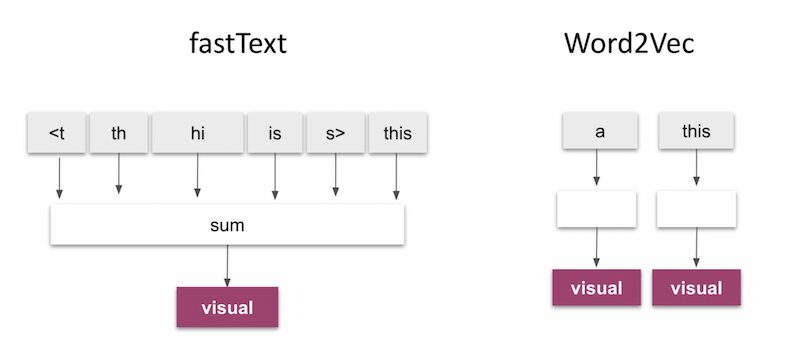

In [39]:
# Comparing similarity to get the top matches using fastText pretrained model
#
# product_id = product name 
# df = product database
# similarity = similarity measures: 'manhattan', 'euclidean', 'cosine'
# n = number of proudcts to recommend

def get_recommendation_fasttext(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    input_index = list(row.index)[0]
    description = row['desc_lowered'].loc[input_index]

    #create vectors for each description using fasttext
    vector_matrix = np.empty((len(desc_list), 300))
    for index, each_sentence in enumerate(desc_list):   
        sentence_vector = np.zeros((300,))  
        count  = 0
        for each_word in each_sentence.split():      
            try:
                sentence_vector += fasttext_model.wv[each_word] 
                count += 1
            except:
                continue
        
        vector_matrix[index] = sentence_vector
        
    if similarity == "cosine":
        sim_matrix = cosine_similarity(vector_matrix)
        products = find_similarity(sim_matrix , input_index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(vector_matrix)
        products = find_manhattan_distance(sim_matrix , input_index)
        
    else:
        sim_matrix = euclidean_distances(vector_matrix)
        products = find_euclidean_distances(sim_matrix , input_index)

    return products

In [40]:
# Cosine Similarity 
get_recommendation_fasttext(product_id, unique_df, similarity = "cosine", n=10)

[{'value': 'All Weather Cornhole Bags - Set of 8', 'score': 0.95},
 {'value': 'American Foxhound Christmas Sticky Note Holder BB8433SN',
  'score': 0.95},
 {'value': '94" Bottom Width x 96 1/2" Top Width x 5 1/2"H x 1 3/4"P Stockton Crosshead',
  'score': 0.94},
 {'value': 'Business Essentials 8" x 8" x 5" Corrugated Mailers, 12-Pack',
  'score': 0.94},
 {'value': 'Efavormart Pack of 5 Premium 17" x 17" Washable Polyester Napkins Great for Wedding Party Restaurant Dinner Parties',
  'score': 0.94},
 {'value': '16 inches 40 inches "MERRY CHRISTMAS" Letter Foil Inflated Balloon Float Helium Aluminum Balloons for Christmas Decoration',
  'score': 0.94},
 {'value': 'Ribbon Bazaar Double Faced Satin 2-1/4 inch Leaf Green 25 yards 100% Polyester Ribbon',
  'score': 0.94},
 {'value': 'Buckle-Down Pet Leash - Buffalo Plaid Black Green - 4 Feet Long - 1 2" Wide',
  'score': 0.94},
 {'value': "Diamond Clear Jewel Tone 3' Latex Balloon", 'score': 0.93},
 {'value': 'COFFEY Street Sign Rustic Chic 

In [41]:
# Manhattan Similarity 
get_recommendation_fasttext(product_id, unique_df, similarity = "manhattan", n=10)

[{'value': 'Spiral Birthday Candles, 36 Count', 'score': 256.96},
 {'value': 'Just Artifacts Gold Glitter Letter B', 'score': 275.4},
 {'value': 'Giant 36in. Purple Balloons (Set of 2)', 'score': 286.76},
 {'value': '(2-Pack) StealthShields Tablet Screen Protector for Lenovo IdeaPad Yoga 11 (U...',
  'score': 292.03},
 {'value': 'Platinum 5 mm Comfort Fit Half Round Wedding Band - Size 9.5',
  'score': 296.64},
 {'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 311.01},
 {'value': "Call of the Wild Howling the Full Moon Women's Racerback Alpha Wolf",
  'score': 311.35},
 {'value': 'IN-70/65 Blue Paper Streamers 2PK', 'score': 318.63},
 {'value': 'Ganma Superheroes Ordinary Life Case For Samsung Galaxy Note 5 Hard Case Cover',
  'score': 321.6},
 {'value': "New Way 075 - Men's Sleeveless Fbi Female Body Inspector",
  'score': 324.14}]

In [42]:
# Euclidean Similarity 
get_recommendation_fasttext(product_id, unique_df, similarity = "euclidean", n=10)

[{'value': 'Spiral Birthday Candles, 36 Count', 'score': 19.13},
 {'value': 'Just Artifacts Gold Glitter Letter B', 'score': 19.92},
 {'value': 'Giant 36in. Purple Balloons (Set of 2)', 'score': 21.02},
 {'value': '(2-Pack) StealthShields Tablet Screen Protector for Lenovo IdeaPad Yoga 11 (U...',
  'score': 22.99},
 {'value': 'Ganma Superheroes Ordinary Life Case For Samsung Galaxy Note 5 Hard Case Cover',
  'score': 23.2},
 {'value': 'Platinum 5 mm Comfort Fit Half Round Wedding Band - Size 9.5',
  'score': 23.21},
 {'value': 'IN-70/65 Blue Paper Streamers 2PK', 'score': 23.46},
 {'value': "New Way 075 - Men's Sleeveless Fbi Female Body Inspector",
  'score': 23.91},
 {'value': 'Coral Parchment Treat Bags', 'score': 24.03},
 {'value': '031 - Unisex Long-Sleeve T-Shirt Disobey V For Vendetta Anonymous Fawkes Mask',
  'score': 24.23}]

## GloVe

The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But keep in mind that there’s quite a bit of synergy between the GloVe and Word2vec.



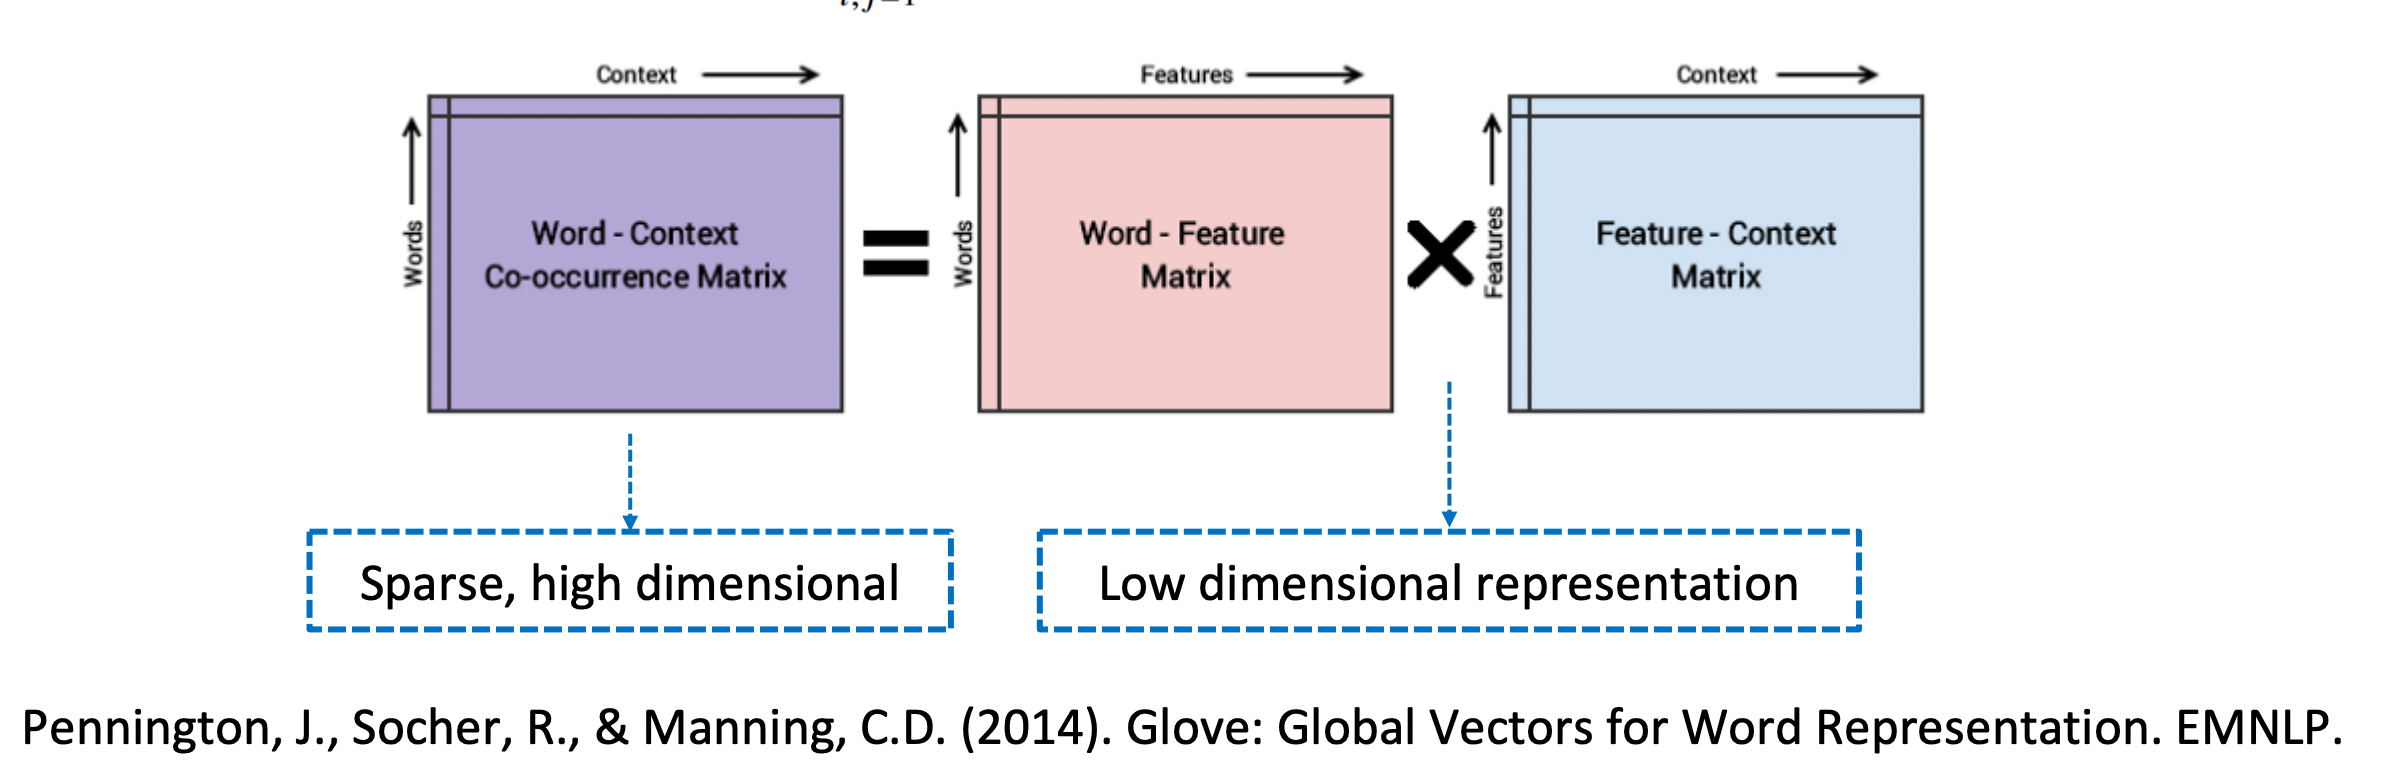

In [43]:
# Comparing similarity to get the top matches using Glove pretrained model
#
# product_id = product name 
# df = product database
# similarity = similarity measures: 'manhattan', 'euclidean', 'cosine'
# n = number of proudcts to recommend

def get_recommendation_glove(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    input_index = list(row.index)[0]
    description = row['desc_lowered'].loc[input_index]

    #using glove embeddings to create vectors
    vector_matrix = np.empty((len(desc_list), 300))
    for index, each_sentence in enumerate(desc_list):
        sentence_vector = np.zeros((300,))
        count  = 0
        for each_word in each_sentence.split():
            try:
                sentence_vector += glove_model[each_word]
                count += 1
                
            except:
                continue
        
        vector_matrix[index] = sentence_vector
    
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(vector_matrix)
        products = find_similarity(sim_matrix , input_index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(vector_matrix)
        products = find_manhattan_distance(sim_matrix , input_index)
        
    else:
        sim_matrix = euclidean_distances(vector_matrix)
        products = find_euclidean_distances(sim_matrix , input_index)

    return products

In [44]:
# Cosine Similarity 
get_recommendation_glove(product_id, unique_df, similarity = "cosine", n=10)

[{'value': 'Red Gift Wrap Bag by K-Kraft (Festive Red Stripes, 13 x 17.5 inches)',
  'score': 0.94},
 {'value': 'Cat Mod Garden Complex - Unfinished/Black', 'score': 0.93},
 {'value': 'CafePress - FIN Nuts Squirrel - Cute Infant Baby Football Bodysuit',
  'score': 0.93},
 {'value': 'American Foxhound Christmas Sticky Note Holder BB8433SN',
  'score': 0.93},
 {'value': 'CHAIM Street Sign Childrens Name Room Sign | Indoor/Outdoor | Â\xa024" Wide',
  'score': 0.93},
 {'value': 'All Weather Cornhole Bags - Set of 8', 'score': 0.93},
 {'value': '12 Pcs 3D Butterfly Stickers DIY Mural Art Decal Wall Stickers Crafts Wall Paper Decor (Yellow Series)',
  'score': 0.93},
 {'value': 'MightySkins Skin for Fitbit Charge 3 - Cartoon Mania | Protective, Durable, and Unique Vinyl Decal wrap cover | Easy To Apply, Remove, and Change Styles | Made in the USA',
  'score': 0.93},
 {'value': 'Ecclesiastes 8:15 so I commend the enjoymentÃ¢â‚¬Â¦ Vinyl Decal Sticker Quote - Small - Metallic Gold',
  'score': 

In [45]:
# Manhattan Similarity 
get_recommendation_fasttext(product_id, unique_df, similarity = "manhattan", n=10)

[{'value': 'Spiral Birthday Candles, 36 Count', 'score': 256.96},
 {'value': 'Just Artifacts Gold Glitter Letter B', 'score': 275.4},
 {'value': 'Giant 36in. Purple Balloons (Set of 2)', 'score': 286.76},
 {'value': '(2-Pack) StealthShields Tablet Screen Protector for Lenovo IdeaPad Yoga 11 (U...',
  'score': 292.03},
 {'value': 'Platinum 5 mm Comfort Fit Half Round Wedding Band - Size 9.5',
  'score': 296.64},
 {'value': 'storefront christmas LED Decoration Light Gold Color Star Shape Vine Wedding Party event',
  'score': 311.01},
 {'value': "Call of the Wild Howling the Full Moon Women's Racerback Alpha Wolf",
  'score': 311.35},
 {'value': 'IN-70/65 Blue Paper Streamers 2PK', 'score': 318.63},
 {'value': 'Ganma Superheroes Ordinary Life Case For Samsung Galaxy Note 5 Hard Case Cover',
  'score': 321.6},
 {'value': "New Way 075 - Men's Sleeveless Fbi Female Body Inspector",
  'score': 324.14}]

In [46]:
# Euclidean Similarity 
get_recommendation_fasttext(product_id, unique_df, similarity = "euclidean", n=10)

[{'value': 'Spiral Birthday Candles, 36 Count', 'score': 19.13},
 {'value': 'Just Artifacts Gold Glitter Letter B', 'score': 19.92},
 {'value': 'Giant 36in. Purple Balloons (Set of 2)', 'score': 21.02},
 {'value': '(2-Pack) StealthShields Tablet Screen Protector for Lenovo IdeaPad Yoga 11 (U...',
  'score': 22.99},
 {'value': 'Ganma Superheroes Ordinary Life Case For Samsung Galaxy Note 5 Hard Case Cover',
  'score': 23.2},
 {'value': 'Platinum 5 mm Comfort Fit Half Round Wedding Band - Size 9.5',
  'score': 23.21},
 {'value': 'IN-70/65 Blue Paper Streamers 2PK', 'score': 23.46},
 {'value': "New Way 075 - Men's Sleeveless Fbi Female Body Inspector",
  'score': 23.91},
 {'value': 'Coral Parchment Treat Bags', 'score': 24.03},
 {'value': '031 - Unisex Long-Sleeve T-Shirt Disobey V For Vendetta Anonymous Fawkes Mask',
  'score': 24.23}]

## Co-occurrence matrix

The purpose of this matrix is to present the number of times each word appears in the same context.
'Roses are red. Sky is blue' results in the following matrix.

From https://link.springer.com/chapter/10.1007/978-1-4842-8954-9_3
Content-Based Recommender Systems
Akshay Kulkarni, Adarsha Shivananda, Anoosh Kulkarni & V Adithya Krishnan 

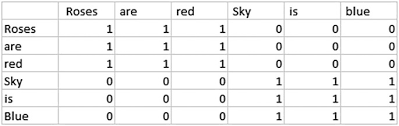

In [47]:
# create cooccurence matrix

#preprocessing
df = df.head(250)
# Combining Product and Description
df['Description'] = df['Product Name'] + ' ' +df['Description']
unique_df = df.drop_duplicates(subset=['Description'], keep='first')
unique_df['desc_lowered'] = unique_df['Description'].apply(lambda x: x.lower())  
unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
desc_list = list(unique_df['desc_lowered'])

co_ocr_vocab = []
for i in desc_list:
    [co_ocr_vocab.append(x) for x in i.split()]

co_occur_vector_matrix = np.zeros((len(co_ocr_vocab), len(co_ocr_vocab)))

for _, sent in enumerate(desc_list):
    words = sent.split()
    for index, word in enumerate(words):
        if index != len(words)-1:
            co_occur_vector_matrix[co_ocr_vocab.index(word)][co_ocr_vocab.index(words[index+1])] += 1


/var/folders/y5/013n1jzn1l98t92dgv99vpz80000gn/T/ipykernel_70256/1466182228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Product Name'] + ' ' +df['Description']
/var/folders/y5/013n1jzn1l98t92dgv99vpz80000gn/T/ipykernel_70256/1466182228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['desc_lowered'] = unique_df['Description'].apply(lambda x: x.lower())
/var/folders/y5/013n1jzn1l98t92dgv99vpz80000gn/T/ipykernel_70256/1466182228.py:9: SettingWithCopyWarning: 
A val

In [48]:
# Comparing similarity to get the top matches using cooccurence matrix
#
# product_id = product name 
# df = product database
# similarity = similarity measures: 'manhattan', 'euclidean', 'cosine'
# n = number of proudcts to recommend

def get_recommendation_coccur(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    input_index = list(row.index)[0]
    description = row['desc_lowered'].loc[input_index]

    vector_matrix = np.empty((len(desc_list), len(co_ocr_vocab)))
    for index, each_sentence in enumerate(desc_list):  
        sentence_vector = np.zeros((len(co_ocr_vocab),))
        count  = 0
        for each_word in each_sentence.split(): 
            try:
                sentence_vector += co_occur_vector_matrix[co_ocr_vocab.index(each_word)]
                count += 1
                
            except:
                continue
        
        vector_matrix[index] = sentence_vector/count
    
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(vector_matrix)
        products = find_similarity(sim_matrix , index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(vector_matrix)
        products = find_manhattan_distance(sim_matrix , index)
        
    else:
        sim_matrix = euclidean_distances(vector_matrix)
        products = find_euclidean_distances(sim_matrix , index)

    return products


In [50]:
# Cosine Similarity 
get_recommendation_coccur(product_id, unique_df, similarity = "cosine", n=10)

[{'value': 'Medi Comfort Closed Toe Knee Highs -15-20 mmHg Reg',
  'score': 0.94},
 {'value': "JustVH Women's Solid Henley V-Neck Casual Blouse Pleated Button Tunic Shirt Top",
  'score': 0.94},
 {'value': 'Toddler Kid Boys Girls Lightweight Breathable Trendy Slip-on Sneaker (6M US Toddler, Red)',
  'score': 0.94},
 {'value': "Pull-Ups Girls' Learning Designs Training Pants (Choose Pant Size and Count)",
  'score': 0.94},
 {'value': 'Ebe Reading Glasses Mens Womens Amber Red Oval Round Full Frame Anti Glare grade ckbdp9118',
  'score': 0.92},
 {'value': "CafePress - Surf's Up! - Men's Light Pajamas", 'score': 0.91},
 {'value': 'Sculpey Polymer Clay Just Orange', 'score': 0.91},
 {'value': 'Ebe Women Reading Glasses Reader Cheaters Anti Reflective Lenses TR90 ry2209',
  'score': 0.9},
 {'value': "Dr. Comfort Paradise Women's Casual Shoe: 4.5 X-Wide (E-2E) Black Velcro",
  'score': 0.9},
 {'value': 'Basics - Blank Adult Hoodie Sweatshirt', 'score': 0.89}]

In [51]:
# Manhattan Similarity 
get_recommendation_coccur(product_id, unique_df, similarity = "manhattan", n=10)


[{'value': 'Toddler Kid Boys Girls Lightweight Breathable Trendy Slip-on Sneaker (6M US Toddler, Red)',
  'score': 30.42},
 {'value': "Pull-Ups Girls' Learning Designs Training Pants (Choose Pant Size and Count)",
  'score': 36.01},
 {'value': 'Medi Comfort Closed Toe Knee Highs -15-20 mmHg Reg',
  'score': 36.35},
 {'value': "Women's Breeze Walker", 'score': 39.91},
 {'value': "JustVH Women's Solid Henley V-Neck Casual Blouse Pleated Button Tunic Shirt Top",
  'score': 41.29},
 {'value': 'Box Packaging White Deluxe Literature Mailer, 50/Bundle',
  'score': 41.77},
 {'value': 'Ebe Reading Glasses Mens Womens Amber Red Oval Round Full Frame Anti Glare grade ckbdp9118',
  'score': 42.64},
 {'value': "Dr. Comfort Paradise Women's Casual Shoe: 4.5 X-Wide (E-2E) Black Velcro",
  'score': 44.48},
 {'value': "Casual Nights Women's 2 Piece Floral Robe and Gown Set",
  'score': 47.1},
 {'value': 'Heavy Duty Handlebar Motorcycle Mount Holder Kit fits Apple iPad 2 3 & 4',
  'score': 47.41}]

In [52]:
# Euclidean Similarity 
get_recommendation_coccur(product_id, unique_df, similarity = "euclidean", n=10)


[{'value': 'Toddler Kid Boys Girls Lightweight Breathable Trendy Slip-on Sneaker (6M US Toddler, Red)',
  'score': 2.17},
 {'value': "Pull-Ups Girls' Learning Designs Training Pants (Choose Pant Size and Count)",
  'score': 2.31},
 {'value': 'Medi Comfort Closed Toe Knee Highs -15-20 mmHg Reg',
  'score': 2.35},
 {'value': "JustVH Women's Solid Henley V-Neck Casual Blouse Pleated Button Tunic Shirt Top",
  'score': 2.53},
 {'value': "Dr. Comfort Paradise Women's Casual Shoe: 4.5 X-Wide (E-2E) Black Velcro",
  'score': 2.73},
 {'value': 'Box Packaging White Deluxe Literature Mailer, 50/Bundle',
  'score': 2.8},
 {'value': 'Ebe Reading Glasses Mens Womens Amber Red Oval Round Full Frame Anti Glare grade ckbdp9118',
  'score': 2.81},
 {'value': 'Nail DIP Powder, Classic Color Collection, Dipping Acrylic For Any Kit or System by DipWell (CL - 58)',
  'score': 2.85},
 {'value': "Women's Breeze Walker", 'score': 2.94},
 {'value': 'Bare Nature Vitamin Iced Tea - Guava Pineapple, 20 Fl. Oz. Bo